In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\91808\Downloads\Titanic_train.csv")  # replace with your actual file name
df1=pd.read_csv(r"C:\Users\91808\Downloads\Titanic_test.csv")
# Check for missing values
print(df.isnull().sum())

# Basic stats
print(df.describe())
print(df.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  


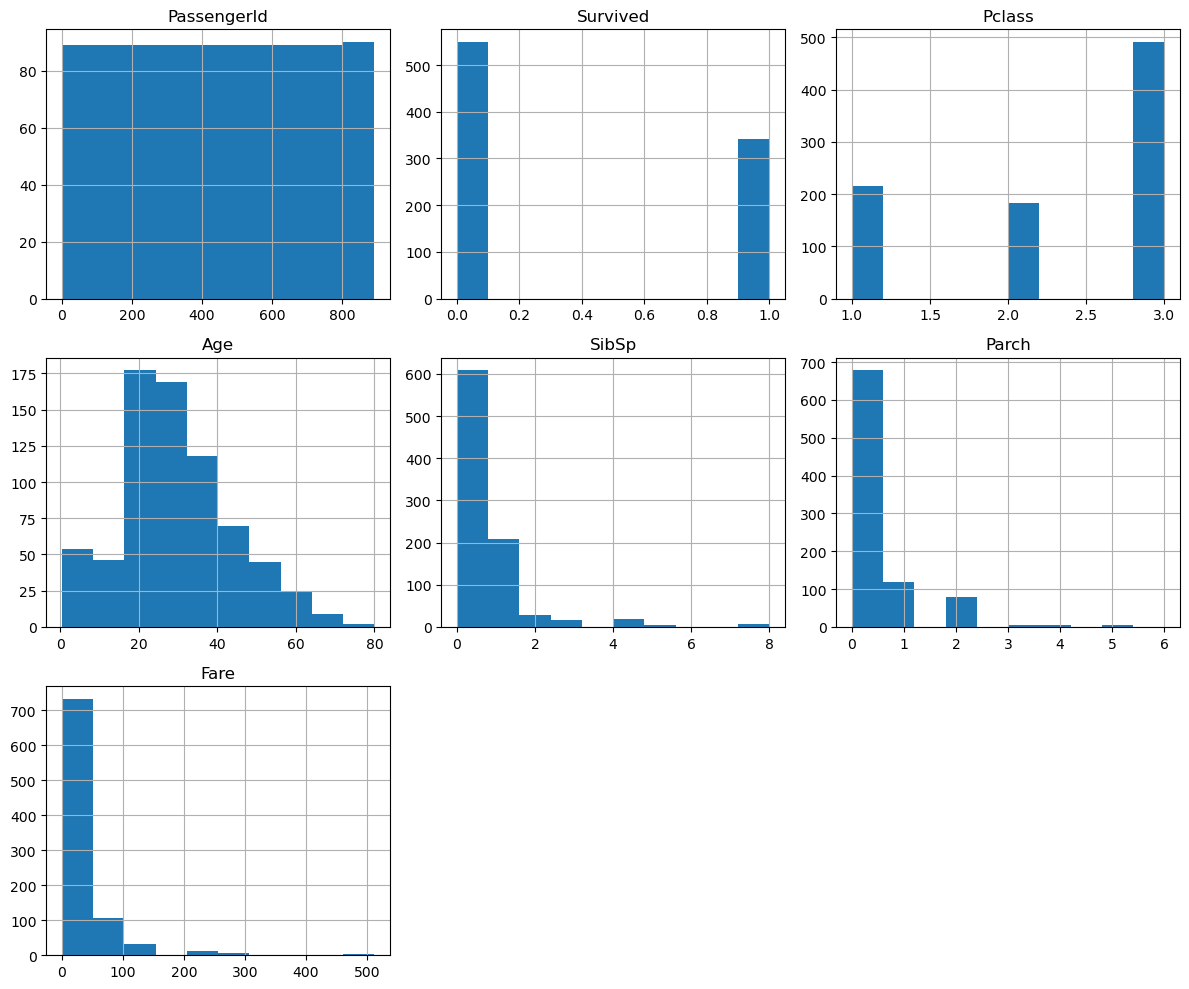

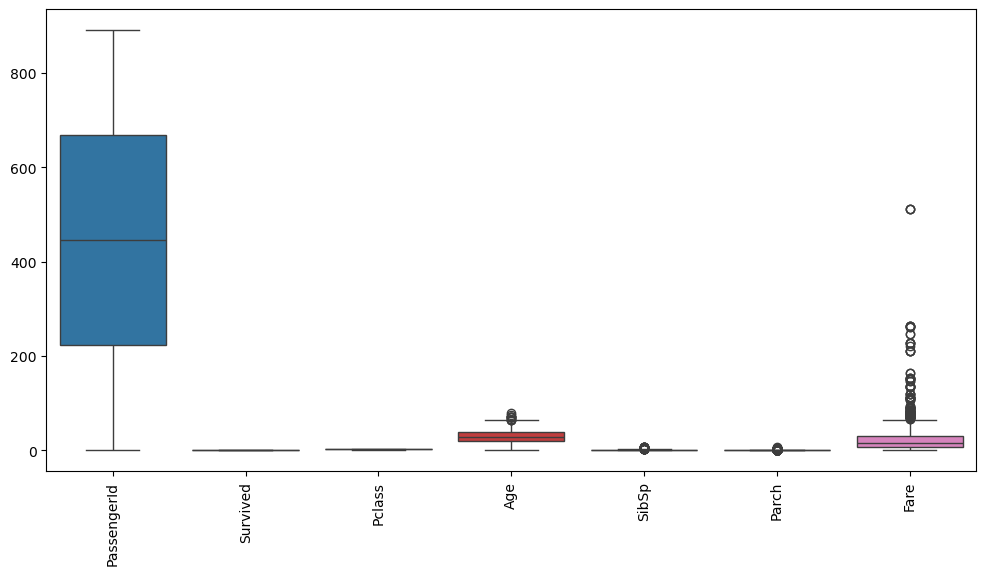

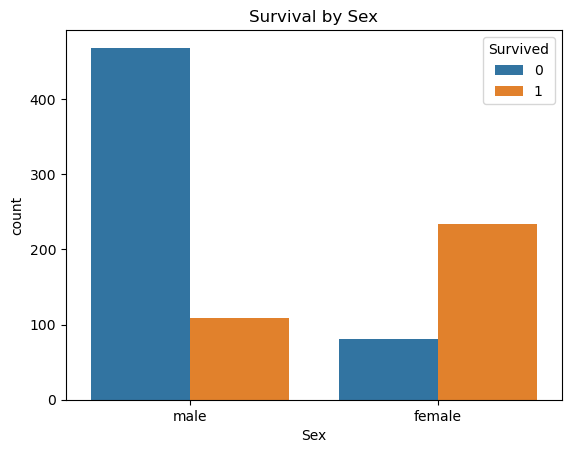

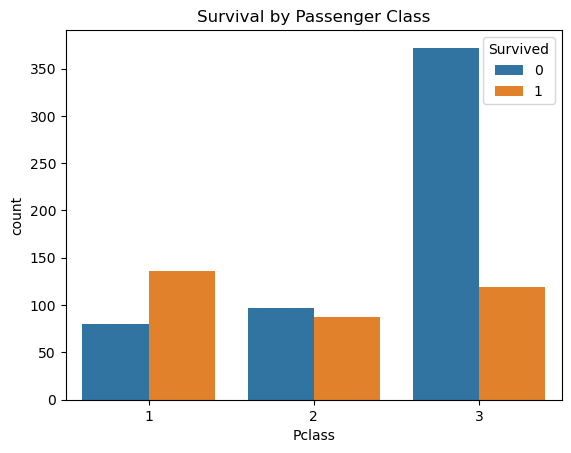

In [3]:
# Histograms
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()

# Bar plots: Survival vs other features
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Sex")
plt.show()

sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Impute missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)  # drop irrelevant or high-missing columns

# Encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import warnings
warnings.filterwarnings('ignore')

In [7]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluation function
def evaluate(y_true, y_pred, model_name):
    print(f"\n=== {model_name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate(y_test, lgb_preds, "LightGBM")
evaluate(y_test, xgb_preds, "XGBoost")

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\91808\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:32:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [11]:
from sklearn.model_selection import GridSearchCV

params_lgb = {'num_leaves': [31, 50], 'learning_rate': [0.1, 0.05]}
grid_lgb = GridSearchCV(lgb.LGBMClassifier(), param_grid=params_lgb, cv=5, scoring='accuracy')
grid_lgb.fit(X_train, y_train)
print("Best LightGBM params:", grid_lgb.best_params_)

params_xgb = {'max_depth': [3, 5], 'learning_rate': [0.1, 0.05]}
grid_xgb = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                        param_grid=params_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
print("Best XGBoost params:", grid_xgb.best_params_)
import warnings
warnings.filterwarnings('ignore')

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


      Model  Accuracy  Precision    Recall  F1-Score
0  LightGBM  0.798883   0.779412  0.716216  0.746479
1   XGBoost  0.793296   0.753425  0.743243  0.748299


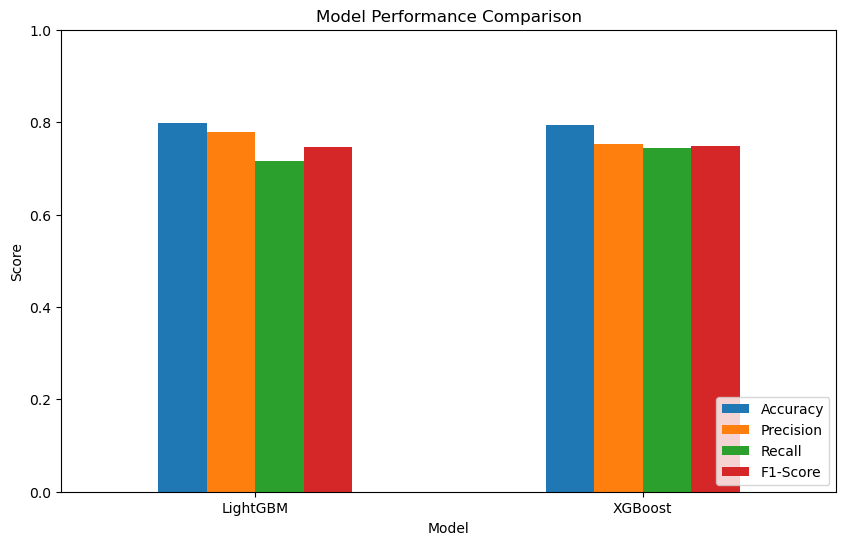

In [9]:
results = {
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [accuracy_score(y_test, lgb_preds), accuracy_score(y_test, xgb_preds)],
    "Precision": [precision_score(y_test, lgb_preds), precision_score(y_test, xgb_preds)],
    "Recall": [recall_score(y_test, lgb_preds), recall_score(y_test, xgb_preds)],
    "F1-Score": [f1_score(y_test, lgb_preds), f1_score(y_test, xgb_preds)]
}

results_df = pd.DataFrame(results)
print(results_df)

# Plot comparison
results_df.set_index("Model").plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()